In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats


In [2]:
mouse_data = pd.read_csv('Mouse_metadata.csv')
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results = pd.read_csv('Study_results.csv')
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#combine the data
mouse_data_full = pd.merge(mouse_data,study_results,how="left",on='Mouse ID')
mouse_data_full.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
mouse_data_full["Mouse ID"].value_counts()

g989    13
m546    10
g288    10
f545    10
l700    10
        ..
h428     1
v199     1
x226     1
b447     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
duplicate_mouse_ids = mouse_data_full.loc[mouse_data_full.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()



In [7]:
print(duplicate_mouse_ids)

['g989']


In [8]:
duplicate_mouse = mouse_data_full.loc[mouse_data_full["Mouse ID"]=="g989",:]
duplicate_mouse.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
mouse_data_full = mouse_data_full.drop(mouse_data_full.index[908])

In [10]:
mouse_data_full = mouse_data_full.rename(columns={"Tumor Volume (mm3)":"Tumor Volume",
                                         "Weight (g)":"Weight"})
mouse_data_full.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
mouse_data_full["Mouse ID"].value_counts()

g989    12
m546    10
g288    10
f545    10
l700    10
        ..
h428     1
v199     1
x226     1
b447     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [12]:
grouped_data = mouse_data_full.groupby(['Drug Regimen'])

In [13]:
print(grouped_data)

In [14]:
mean = grouped_data["Tumor Volume"].mean()

In [15]:
median = grouped_data["Tumor Volume"].median()

In [16]:
sem = grouped_data["Tumor Volume"].sem()

In [17]:
std = grouped_data["Tumor Volume"].std()

In [18]:
var = grouped_data["Tumor Volume"].var()

In [19]:
regimen_summary = pd.DataFrame(grouped_data["Drug Regimen"].count())
regimen_summary["Median"] = median
regimen_summary["Mean"] = mean   
regimen_summary["SEM"] = sem
regimen_summary["Standard Deviation"] = std
regimen_summary["Variance"] = var
regimen_summary

,Drug Regimen,Median,Mean,SEM,Standard Deviation,Variance
Drug Regimen,,,,,,
Capomulin,230,41.557809,40.675741,0.329346,4.994774,24.947764
Ceftamin,178,51.776157,52.591172,0.469821,6.268188,39.290177
Infubinol,178,51.820584,52.884795,0.492236,6.567243,43.128684
Ketapril,188,53.698743,55.235638,0.603860,8.279709,68.553577
Naftisol,186,52.509285,54.331565,0.596466,8.134708,66.173479
Placebo,181,52.288934,54.033581,0.581331,7.821003,61.168083
Propriva,160,50.909965,52.368318,0.514041,6.502160,42.278090
Ramicane,228,40.673236,40.216745,0.320955,4.846308,23.486704
Stelasyn,181,52.431737,54.233149,0.573111,7.710419,59.450562


In [20]:
mouse_data_full.groupby(['Drug Regimen']).agg({'Tumor Volume':['mean','median','sem','std','var']})

Tumor Volume                                          
                     mean     median       sem       std        var
Drug Regimen                                                       
Capomulin       40.675741  41.557809  0.329346  4.994774  24.947764
Ceftamin        52.591172  51.776157  0.469821  6.268188  39.290177
Infubinol       52.884795  51.820584  0.492236  6.567243  43.128684
Ketapril        55.235638  53.698743  0.603860  8.279709  68.553577
Naftisol        54.331565  52.509285  0.596466  8.134708  66.173479
Placebo         54.033581  52.288934  0.581331  7.821003  61.168083
Propriva        52.368318  50.909965  0.514041  6.502160  42.278090
Ramicane        40.216745  40.673236  0.320955  4.846308  23.486704
Stelasyn        54.233149  52.431737  0.573111  7.710419  59.450562
Zoniferol       53.236507  51.818479  0.516398  6.966589  48.533355

In [21]:
grouped_data = mouse_data_full.groupby(['Drug Regimen'])
print(grouped_data)

In [22]:
time_points = grouped_data['Timepoint'].sum()

Text(0, 0.5, 'Timepoints')

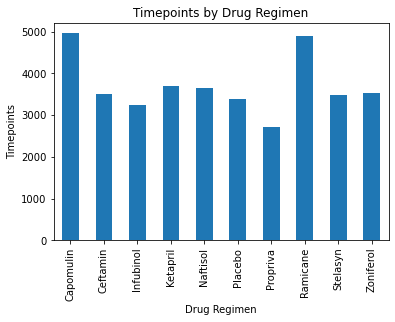

In [23]:
time_point_chart = time_points.plot(kind="bar", title="Timepoints by Drug Regimen")
time_point_chart.set_ylabel("Timepoints")

In [24]:
mice_grouped = mouse_data_full.groupby(['Sex'])
print(mice_grouped)

In [25]:
mice_grouped["Mouse ID"].count()

Sex
Female    934
Male      958
Name: Mouse ID, dtype: int64

In [26]:
mouse_summary = pd.DataFrame(mice_grouped["Sex"].count())
mouse_summary

,Sex
Sex,
Female,934
Male,958


(-1.1047298923432014,
 1.1002252329687239,
 -1.1028246547483551,
 1.1053883987155488)

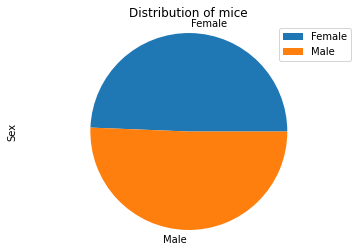

In [27]:
mouse_pie = mouse_summary.plot(kind="pie",y='Sex',title=("Distribution of mice"))
plt.axis("equal")
                              

In [28]:
max_timepoint = mouse_data_full.groupby(["Mouse ID"])['Timepoint'].max()
print(max_timepoint)

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64


In [29]:
mouse_data_timepoint = pd.merge(mouse_data_full,max_timepoint,on='Mouse ID')
mouse_data_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint_x,Tumor Volume,Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [30]:
capomulin_regimen = mouse_data_timepoint.loc[mouse_data_timepoint["Drug Regimen"]=="Capomulin",:]
capomulin_regimen.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint_x,Tumor Volume,Metastatic Sites,Timepoint_y
10,s185,Capomulin,Female,3,17,0,45.000000,0,45
11,s185,Capomulin,Female,3,17,5,43.878496,0,45
12,s185,Capomulin,Female,3,17,10,37.614948,0,45
13,s185,Capomulin,Female,3,17,15,38.177232,0,45
14,s185,Capomulin,Female,3,17,20,36.866876,0,45


In [31]:
total_volume = capomulin_regimen.groupby(["Mouse ID"])['Tumor Volume'].sum()
print(total_volume)

Mouse ID
b128    419.636356
b742    400.836993
f966    182.529864
g288    419.900966
g316    446.133439
i557    448.058097
i738    391.410528
j119    444.652363
j246    345.735397
l509    444.344738
l897    425.072610
m601    348.474699
m957    390.498164
r157    183.195878
r554    365.092120
r944    433.673645
s185    345.591434
s710    428.037330
t565    393.287251
u364    398.874952
v923    415.815951
w150    124.154476
w914    413.524523
x401    361.820396
y793    385.068292
Name: Tumor Volume, dtype: float64


In [32]:
ramicane_regimen = mouse_data_timepoint.loc[mouse_data_timepoint["Drug Regimen"]=="Ramicane",:]
ramicane_regimen.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint_x,Tumor Volume,Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [33]:
total_volume = ramicane_regimen.groupby(["Mouse ID"])['Tumor Volume'].sum()
print(total_volume)

Mouse ID
a411    407.013854
a444    430.600524
a520    379.892187
a644    412.285775
c458    295.884374
c758    418.687691
d251    396.404430
e662    442.681269
g791    374.892366
i177    378.828778
i334    400.338403
j913    391.283327
j989    401.085775
k403    323.588589
m546    388.077946
n364    372.876512
q597    436.040104
q610    345.471885
r811    396.479581
r921    307.018436
s508    360.501562
u196    455.763948
w678     88.166373
y449    181.439088
z578    384.115100
Name: Tumor Volume, dtype: float64


In [35]:
infubinol_regimen = mouse_data_timepoint.loc[mouse_data_timepoint["Drug Regimen"]=="Infubinol",:]
infubinol_regimen.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint_x,Tumor Volume,Metastatic Sites,Timepoint_y
454,a203,Infubinol,Female,20,23,0,45.000000,0,45
455,a203,Infubinol,Female,20,23,5,48.508468,0,45
456,a203,Infubinol,Female,20,23,10,51.852437,1,45
457,a203,Infubinol,Female,20,23,15,52.777870,1,45
458,a203,Infubinol,Female,20,23,20,55.173336,1,45


In [36]:
total_volume = infubinol_regimen.groupby(["Mouse ID"])['Tumor Volume'].sum()
print(total_volume)

Mouse ID
a203    563.127077
a251    552.370946
a577    355.400343
a685    530.114674
c139    587.409429
c326     81.321346
c895    365.386768
e476    550.265428
f345    518.979592
i386    496.576075
k483    557.986798
k804    424.732287
m756     92.010364
n671    368.771469
o809    403.348204
o813     90.699331
q132    348.176054
s121    298.164804
v339     91.250112
v719    250.343133
v766    195.056791
w193    238.231120
w584    356.858666
y163    557.116879
z581    539.795837
Name: Tumor Volume, dtype: float64


In [37]:
ceftamin_regimen = mouse_data_timepoint.loc[mouse_data_timepoint["Drug Regimen"]=="Ceftamin",:]
ceftamin_regimen.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint_x,Tumor Volume,Metastatic Sites,Timepoint_y
484,a275,Ceftamin,Female,20,28,0,45.000000,0,45
485,a275,Ceftamin,Female,20,28,5,46.795257,0,45
486,a275,Ceftamin,Female,20,28,10,47.371343,0,45
487,a275,Ceftamin,Female,20,28,15,49.734404,0,45
488,a275,Ceftamin,Female,20,28,20,50.513437,1,45


In [38]:
total_volume = ceftamin_regimen.groupby(["Mouse ID"])['Tumor Volume'].sum()
print(total_volume)

Mouse ID
a275    527.709651
b447     45.000000
b487    300.047033
b759    358.999841
f436    188.239853
h531     92.784682
j296    538.242259
k210    558.848940
l471    545.009823
l490    354.030820
l558    137.593624
l661    528.558963
l733    534.673552
o287    516.111469
p438    536.643831
q483    469.152373
t573     45.000000
u149    290.022682
u153     45.000000
w151    530.535534
x226     45.000000
x581    532.639398
x822    528.489796
y769    562.908873
y865    549.985586
Name: Tumor Volume, dtype: float64


In [39]:
specific_regimen = mouse_data_full.loc[mouse_data_full["Drug Regimen"]=="Capomulin",:]
specific_regimen.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


<AxesSubplot:title={'center':'Tumor Volume'}, xlabel='Timepoint'>

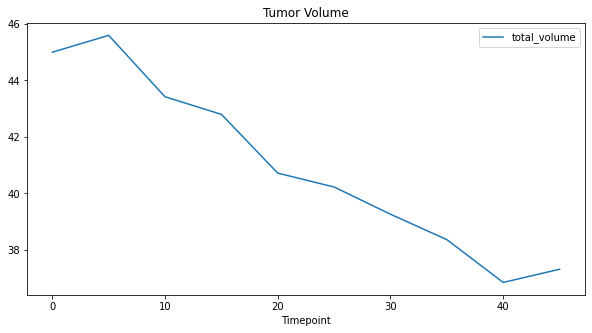

In [44]:
specific_regimen.groupby(['Timepoint']).agg(total_volume=('Tumor Volume', 'median')).plot(figsize=(10, 5), title= "Tumor Volume")

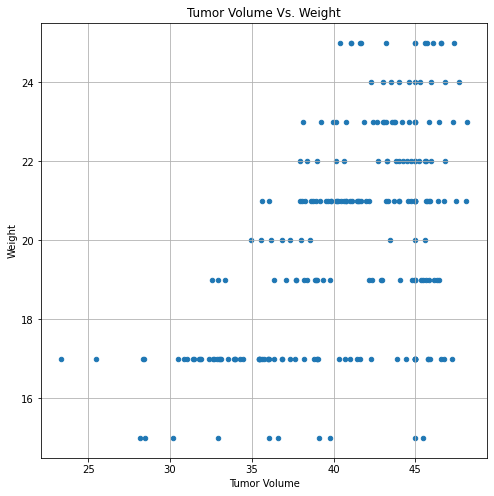

In [45]:
specific_regimen.plot(kind="scatter", x="Tumor Volume", y="Weight", grid=True, figsize=(8,8),
              title="Tumor Volume Vs. Weight")
plt.show()

The r-squared is: 0.2763600223455911


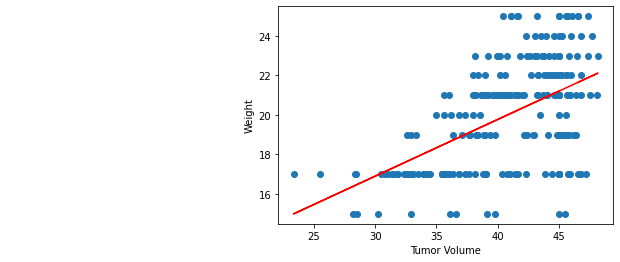

In [46]:
x_values = specific_regimen['Tumor Volume']
y_values = specific_regimen['Weight']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Tumor Volume')
plt.ylabel('Weight')
print(f"The r-squared is: {rvalue**2}")
plt.show()